In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import kmedoids
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabaz_score, silhouette_samples
from sklearn.metrics.pairwise import pairwise_distances

Wybierzmy ładne, kolorowe zdjęcie. Postarajmy się by miał kilka dominijących barw oraz jakieś anomalie (np. mały balonik na tle parku, albo samotny X-Wing na tle galaktyki). Potraktujmy każdy jego piksel jako obserwację w przestrzeni 3-D (po jednym wymiarze na każdy z kolorów). Zdecydujmy czy usuwamy ze zbioru duplikaty (piksele o takich samych wartościach RGB) - nasz wybór wpłynie na finalny wynik. Wykonajmy na takim zbiorze klasteryzację k-means, z następującymi założeniami:
* jako środków klastrów używamy istniejące elementy zbioru, a nie ich średnie (czyli jest to w praktyce k-medoids) - nie chcemy znaleźć kolorów, które nie wystąpiły na zdjęciu;
* dobieramy wartość stałej k używając dowolnej zaproponowanej przez siebie metody.

Prezentujemy uzyskaną paletę, oraz wizualizujemy samą klasteryzację (np. rzutujemy punkty ze zbioru na 2D używając PCA, każdemu z nich środek malujemy na pierwotny kolor, a obwódkę na kolor klastra do którego był przyporządkowany).

In [8]:
data = ('kmeans-data/colorcolor.png', )
output_paths = ('kmeans-data/colors-dataset.csv', )

In [9]:
%matplotlib inline
def show_data(img_path):
    pil_im = Image.open(img_path, 'r')
    plt.grid(False)
    plt.imshow(np.asarray(pil_im))

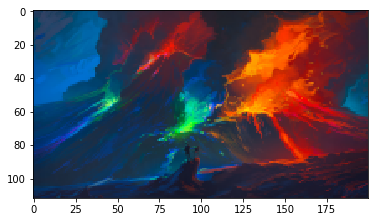

In [10]:
show_data(data[0])

Klasucznie eksportujemy nasz plik do formatu csv dla reuzywalnosci.

In [11]:
def write_data_to_csv(source_img: str, dest_path: str):
    """
    Save given k-means image to csv-like format.
    Csv file contains 2 columns: x co-ordinate, y co-ordinate
    """
    image = Image.open(source_img)
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                pixel_color: tuple = image.getpixel((x,y))[:3]
                dest_file.write(f'{x};{y};{pixel_color[0]};{pixel_color[1]};{pixel_color[2]}\n')

In [12]:
write_data_to_csv(data[0], output_paths[0])

In [13]:
X = pd.read_csv(output_paths[0], sep=';', names=['x', 'y', 'R-value', 'G-value', 'B-value'])
X = np.array(X)[:, 2:]
X = np.unique(X, axis=0)

Uzyłem gotowej implementacji kmedoids. (https://github.com/letiantian/kmedoids)

In [14]:
D = pairwise_distances(X, metric='euclidean')

In [17]:
def CH_scores(X: np.ndarray, D: np.ndarray, repeat: int = 7) -> list:
    """Return list of lists with reapet(20) scores for every k"""
    scores = []
    for k in range(2,10):
        k_score = []
        for r in range(repeat):
            M, C = kmedoids.kMedoids(D, k)
            labels = np.zeros(X.shape[0])
            for label, indexes in C.items():
                labels[indexes] = label
            k_score.append(calinski_harabaz_score(X,labels)) 
        scores.append(k_score)    
            
    return scores 

In [18]:
scores = CH_scores(X, D)

16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507
16507


In [19]:
t = np.array(scores)
t = t.mean(axis=1)

Text(0,0.5,'metric score')

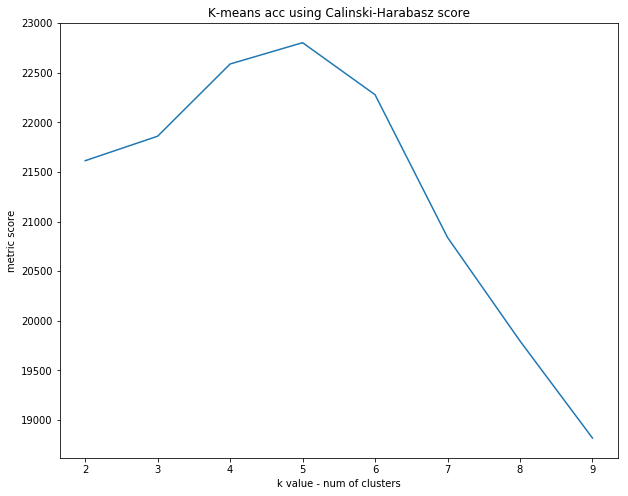

In [21]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(2,10), t)
plt.title("K-means acc using Calinski-Harabasz score")
plt.xlabel('k value - num of clusters')
plt.ylabel('metric score')

In [0]:
best_k = 5
M, C = kmedoids.kMedoids(D, best_k)

labels = np.zeros(X.shape[0])
for label, indecies in C.items():
    labels[indecies] = label

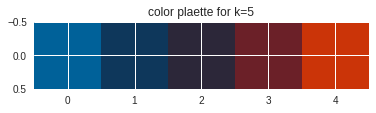

In [64]:
palette = np.array(X[M], dtype=np.uint8)
indices = np.array([np.arange(0, palette.shape[0])])
plt.imshow(palette[indices])
plt.title('color plaette for k={}'.format(best_k))
plt.show()

In [0]:
X_n = None
for label in C.keys():
    labels = np.c_[X[C[label]], np.ones(X[C[label]].shape[0]) * label]
    if X_n is None:
        X_n=np.array(labels)
    else:
        X_n = np.concatenate((X_n, np.array(labels)), axis=0)

cl = X_n[:, 3]
X_n = X_n[:,:3]

In [0]:
pca = PCA(n_components=2)
pca.fit(X_new)
X_w = pca.transform(X_n)

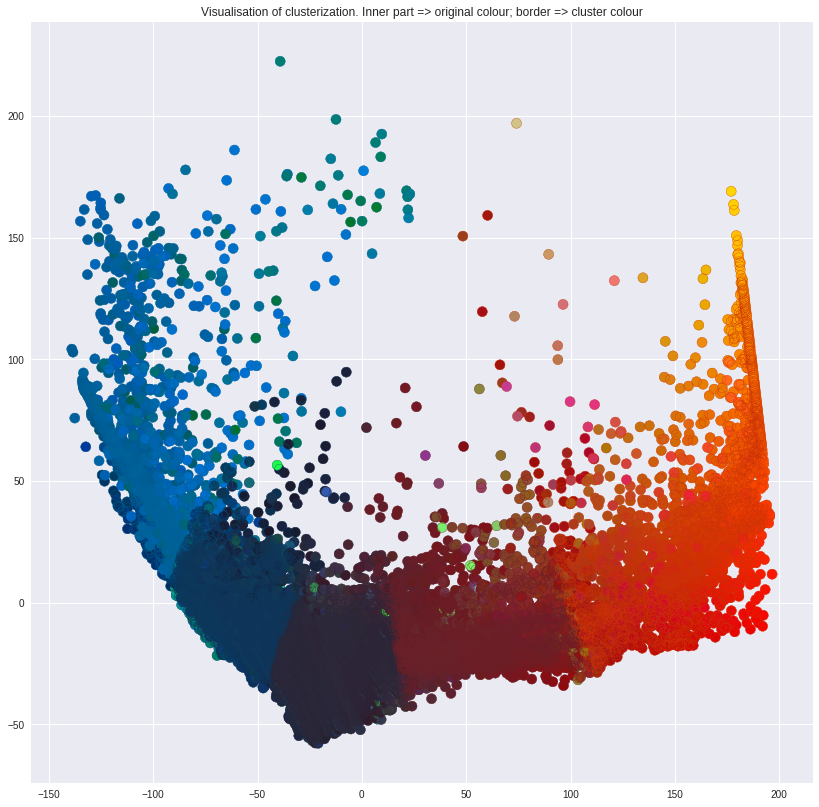

In [94]:
color_vals = np.array(cl, dtype=np.int)
plt.figure(figsize=(14,14))
plt.scatter(X_w[:,0], X_w[:,1], c=X/255.0, s=100)
plt.scatter(X_w[:,0], X_w[:,1], edgecolors=palette[color_vals]/255.0, facecolors='none', s=100)
plt.title("Visualisation of clusterization. Inner part => original colour; border => cluster colour")
plt.show()

In [0]:
silhouette = silhouette_samples(X, labels)

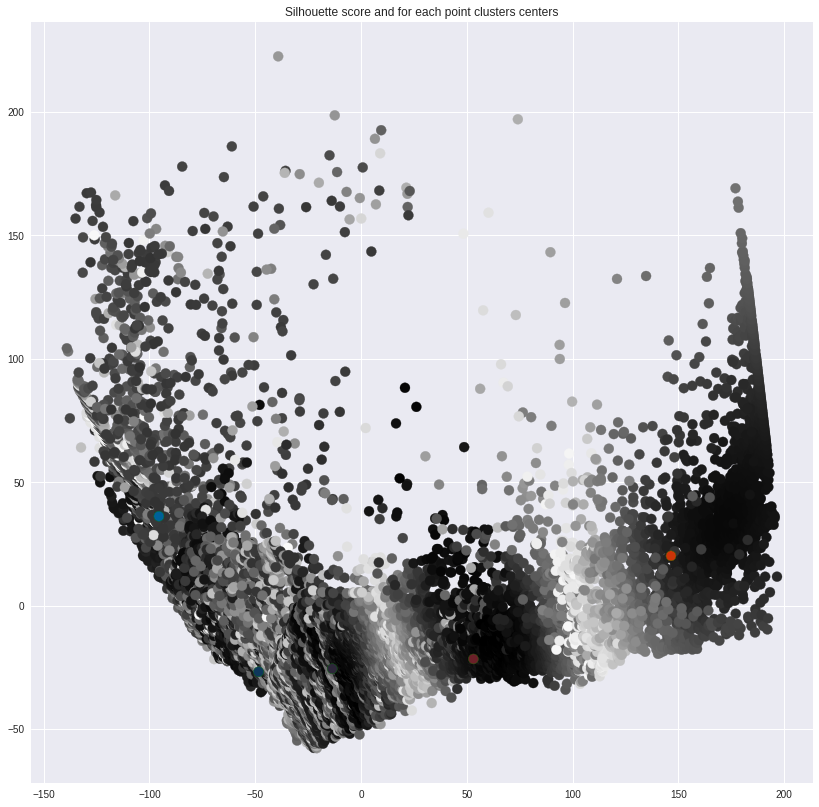

In [96]:
plt.figure(figsize=(14,14))
plt.scatter(X_w[:,0], X_w[:,1], c=silhouette, s=100)
plt.scatter(X_w[M][:,0],X_w[M][:,1], c =X[M]/255.0, s=100 )
plt.scatter(X_w[M][:,0],X_w[M][:,1], facecolors='none', edgecolors='g', s=100 )
plt.title("Silhouette score and for each point clusters centers")
plt.show()